In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

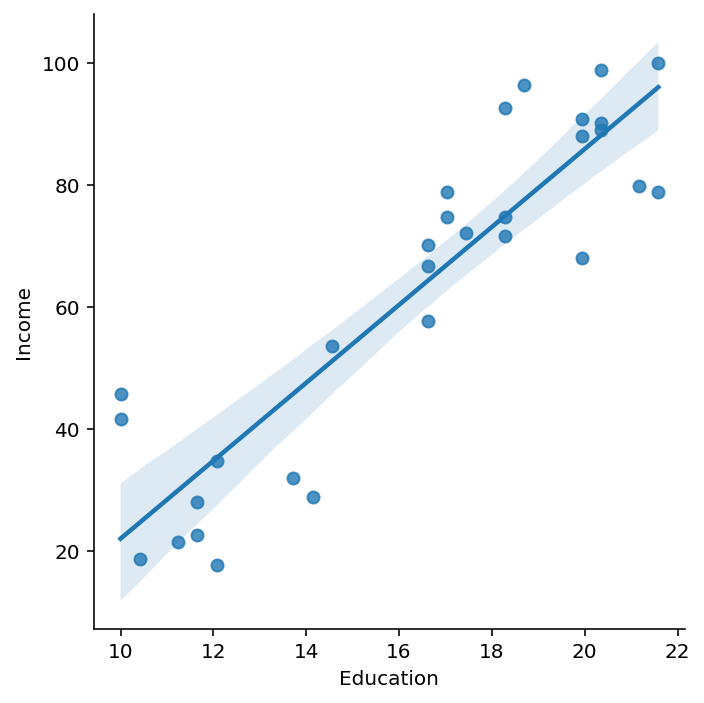

In [4]:
df_income = pd.read_csv("data/models/income.csv")
sns.lmplot(data = df_income, x = "Education", y = "Income")

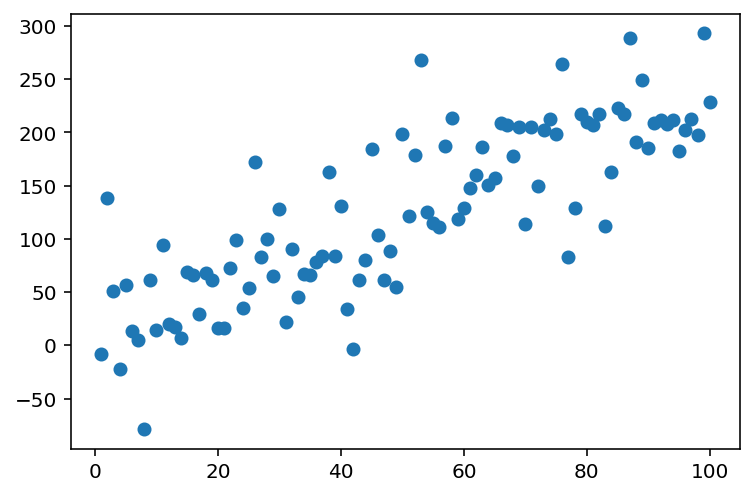

In [11]:
ERROR = np.random.normal(loc = 0, scale = 50, size = 100)
X = np.arange(1, 101) ### Given some inputs X...
beta = 2.5 ### some coefficient relating X to Y
intercept = 1 ### and some intercept
Y = X*beta + intercept + ERROR ### add error now
plot = plt.scatter(X, Y)

<AxesSubplot:xlabel='Education', ylabel='Income'>

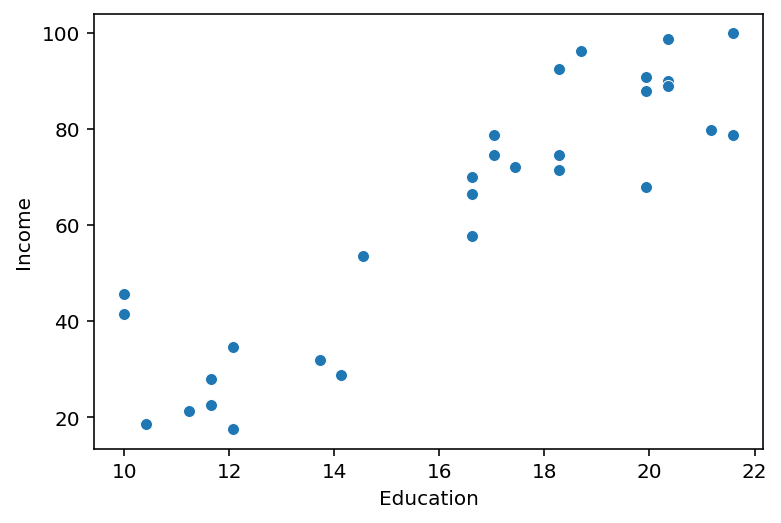

In [17]:
sns.scatterplot(data = df_income, x = "Education", y = "Income")

In [12]:
errors = []
SLOPES = [2.4, 4.4, 6.4, 8.4, 10.4]
for slope in SLOPES:
    y_pred = -40 + df_income['Education'] * slope
    mse = (1/len(df_income)) * sum((y_pred - df_income['Income'])**2) ## calculate mse
    errors.append({'slope': slope,
                  'mse': mse})

In [25]:
slope = 8.4
y_pred = -40 + df_income['Education'] * slope

In [28]:
df_errors = pd.DataFrame(errors)

In [29]:
df_errors

,slope,mse
0,2.4,4377.721798
1,4.4,1127.320852
2,6.4,137.276625
3,8.4,1407.589115
4,10.4,4938.258324


<AxesSubplot:xlabel='slope', ylabel='mse'>

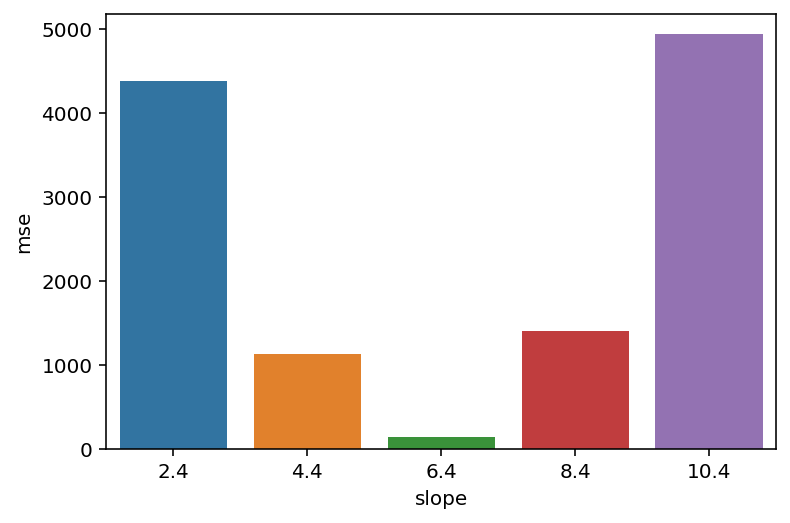

In [30]:
sns.barplot(data = df_errors, x = "slope", y = "mse")